# Supuestos para el modelado del huracán Isaac

Para construir un modelo simplificado del campo de velocidad de un huracán, vamos a hacer los siguientes **supuestos**:

- El huracán se modela como un **fluido ideal**:  
    - El flujo es **incompresible**, es decir, la densidad del fluido es constante y no cambia con el tiempo ni el espacio.  
    - Se **ignora la viscosidad**, ya que se considera irrelevante en un modelo básico.  
    - El flujo es **estacionario**, es decir, la velocidad en cada punto no varía con el tiempo (al menos en intervalos cortos).  
    - El flujo es **bidimensional**, modelando una sección transversal horizontal del huracán.  

Con estos supuestos, el huracán se representa como la combinación de dos flujos básicos:  
- Un **flujo de vórtice** $F_1(x,y)$, donde el fluido se mueve en círculos alrededor del ojo.  
- Un **flujo de sumidero** $F_2(x,y)$, donde el fluido fluye radialmente hacia el ojo.  

El campo total se puede modelar entonces por **superposición**:
$$
F(x,y) = F_1(x,y) + F_2(x,y).
$$

---

## Propiedades de un flujo de vórtice (CCW) alrededor del origen

1. El vector de velocidad en un punto $(x,y)$ es **tangente al círculo** que tiene centro en el origen y pasa por $(x,y)$.  
2. La dirección del vector de velocidad en un punto $(x,y)$ indica un movimiento en el **sentido contrario a las manecillas del reloj**.  
3. La **rapidez del fluido es constante** en círculos con centro en el origen.  
4. La **rapidez del fluido a lo largo de un círculo es inversamente proporcional al radio** del círculo (y en consecuencia la rapidez tiende a $+\infty$ cuando el radio tiende a 0).  

La **intensidad $k$** del flujo de vórtice se define como $2\pi$ veces la rapidez del fluido a lo largo del círculo unitario.  


# Flujo de vórtice en el plano

Vamos a suponer un campo vectorial de la siguiente forma:

$$
F_1(x,y) = -\frac{k}{2\pi(x^2+y^2)}\,(y\,\mathbf{i} - x\,\mathbf{j}),
$$

y comprobar las propiedades enunciadas anteriormente. Primero escribimos sus componentes como

$$
\mathbf{u}(x,y) = \left(u(x,y),\,v(x,y)\right) =
\left(-\frac{k\,y}{2\pi r^2},\;\frac{k\,x}{2\pi r^2}\right),
\qquad r^2 = x^2+y^2.
$$

---

## Propiedades del flujo de vórtice

1. **Tangencial a circunferencias centradas en el origen**  
   En coordenadas polares $x=r\cos\theta,\;y=r\sin\theta$, el vector unitario tangencial es  
   $$
   \mathbf{e}_\theta = (-\sin\theta, \cos\theta) = \left(-\frac{y}{r},\,\frac{x}{r}\right).
   $$ 
   Entonces
   $$
   \mathbf{u}(r,\theta) = \frac{k}{2\pi r}\,\mathbf{e}_\theta,
   $$
   lo que muestra que la velocidad es puramente tangencial a los círculos $r=\text{const}$.

2. **Sentido antihorario (CCW) para $k>0$**  
   El vector $\mathbf{e}_\theta$ apunta en sentido antihorario. Así, si $k>0$ el flujo circula CCW alrededor del origen.  
   (Si $k<0$, el sentido es horario.)

3. **Dependencia radial $1/r$**  
   El módulo de la velocidad es
   $$
   |\mathbf{u}| = \frac{k}{2\pi r}.
   $$
   Esto es característico del vórtice puntual.

4. **Incompresible e irrotacional (fuera del origen)**  
   - Divergencia:
     $$
     \nabla\cdot\mathbf{u} = \frac{\partial u}{\partial x} + \frac{\partial v}{\partial y} = 0,
     \qquad r\neq 0.
     $$
   - Vorticidad:
     $$
     (\nabla\times \mathbf{u})_z = \frac{\partial v}{\partial x} - \frac{\partial u}{\partial y} = 0,
     \qquad r\neq 0.
     $$
     Es decir, el campo es incompresible e irrotacional en todo punto excepto en el origen, donde existe una singularidad que concentra la circulación total.
     
5. **Relación entre $k$ y la rapidez en el círculo unitario**
      En $r=1$ se cumple
      $$
      \mathbf{u} = \frac{k}{2\pi}\,\mathbf{e}_\theta
      \quad \Longrightarrow \quad
      |\mathbf{u}|_{r=1} = \frac{k}{2\pi}.
      $$
      Por tanto, $k$ es exactamente $2\pi$ veces la rapidez en el círculo unidad:
      $$
      k = 2\pi \cdot |\mathbf{u}|_{r=1}.
      $$
      Además, la circulación sobre $r=1$ es
      $$
      \oint_{r=1} \mathbf{u}\cdot d\mathbf{r}
      = \int_0^{2\pi} \frac{k}{2\pi}\, d\theta = k,
      $$
      confirmando que la intensidad del vórtice es $k$.


Text(1.05, 0.0, '|u|(r=1) = 1.00')

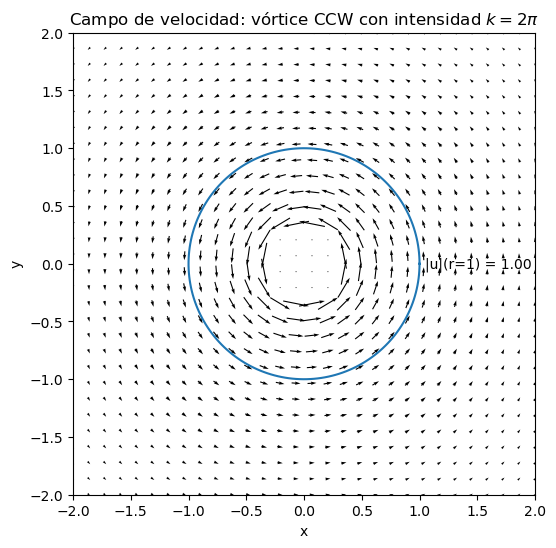

In [1]:
# Código para generar y mostrar el campo de velocidades de un vórtice con intensidad k = 2*pi
import numpy as np
import matplotlib.pyplot as plt

# Parámetros
k = 2 * np.pi  # intensidad
xmin, xmax, ymin, ymax = -2.0, 2.0, -2.0, 2.0
n = 30  # resolución de la malla

# Malla
x = np.linspace(xmin, xmax, n)
y = np.linspace(ymin, ymax, n)
X, Y = np.meshgrid(x, y)
r2 = X**2 + Y**2

# Campo de velocidad para k = 2*pi -> u = -y/r^2, v = x/r^2
# Evitar la singularidad en r=0 usando un pequeño radio mínimo epsilon
epsilon = 1e-3
r2_safe = np.where(r2 < epsilon, np.inf, r2)  # en el origen ponemos r2 grande para obtener (0,0)

U = - (k * Y) / (2 * np.pi * r2_safe)
V =   (k * X) / (2 * np.pi * r2_safe)

# En el punto donde r2 < epsilon, forzamos 0 (centro)
U[r2 < epsilon] = 0.0
V[r2 < epsilon] = 0.0

# Enmascarar el origen (radio mínimo)
r_min = 0.35
mask = np.sqrt(X**2 + Y**2) < r_min
U[mask] = 0
V[mask] = 0

# Dibujar
fig, ax = plt.subplots(figsize=(6,6))
ax.set_aspect('equal')
Q = ax.quiver(X, Y, U, V, pivot='mid', scale=50)  # scale ajusta la longitud visual de las flechas
ax.set_xlim(xmin, xmax)
ax.set_ylim(ymin, ymax)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Campo de velocidad: vórtice CCW con intensidad $k=2\\pi$')

# Añadir circunferencia unidad para referencia
theta = np.linspace(0, 2*np.pi, 200)
ax.plot(np.cos(theta), np.sin(theta))

# Mostrar velocidad en r=1 (debería ser 1)
ax.text(1.05, 0.0, r'|u|(r=1) = {:.2f}'.format(k/(2*np.pi)), va='center')



# Modelado de un flujo de sumidero

Un flujo de sumidero uniforme de un fluido ideal hacia el origen se caracteriza por:

1. El vector de velocidad en cada punto $(x,y)$ está dirigido hacia el origen.  
2. La rapidez del fluido es la misma en todos los puntos de un círculo con centro en el origen.  
3. La rapidez del fluido en un punto es inversamente proporcional a su distancia al origen (por lo que la rapidez tiende a $+\infty$ cuando la distancia tiende a 0).  
4. Hay un **sumidero en el origen** en el cual el fluido sale del flujo.  

La **intensidad $q$** de un flujo de sumidero uniforme se define como $2\pi$ veces la rapidez del fluido en puntos del círculo unitario.  

Si se conoce la intensidad $q$, la rapidez en cualquier punto se obtiene usando que esta es inversamente proporcional a la distancia al origen.  

El objetivo es encontrar una fórmula para un flujo de sumidero uniforme $F_2(x,y)$ con una intensidad especificada $q$.  


# Demostración: flujo de sumidero uniforme $F_2(x,y)$

Consideremos el campo
$$
F_2(x,y)=-\frac{q}{2\pi(x^2+y^2)}\,(x\,\mathbf{i}+y\,\mathbf{j}).
$$
Escribiendo componentes:
$$
\mathbf{u}(x,y)=(u,v)=\left(-\frac{q\,x}{2\pi r^2},\; -\frac{q\,y}{2\pi r^2}\right),
\qquad r^2 := x^2+y^2.
$$
Obsérvese que en muchas fórmulas se evita la singularidad en $r=0$; aquí trabajamos para $r\neq0$ y comentamos el origen por separado.

## (a) Comprobación de las cuatro propiedades de un flujo de sumidero uniforme hacia el origen

1. **El vector de velocidad en cada punto $(x,y)$ está dirigido hacia el origen.**  
   El vector $(x,y)$ apunta radialmente hacia afuera; mediante el signo negativo $- (x,y)$ el vector velocidad apunta radialmente *hacia* el origen. En coordenadas polares, el vector radial unitario es $\mathbf{e}_r=(x/r,y/r)$, por lo que
   $$
   \mathbf{u}(r,\theta) = -\frac{q}{2\pi r}\,\mathbf{e}_r,
   $$
   claramente dirigido hacia el origen debido al signo negativo.

2. **La rapidez del fluido es la misma en todos los puntos de un círculo centrado en el origen.**  
   El módulo depende sólo de $r$:
   $$
   |\mathbf{u}|=\frac{q}{2\pi r}.
   $$
   Por tanto en cualquier círculo $r=$ const la rapidez es constante.

3. **La rapidez en un punto es inversamente proporcional a la distancia al origen.**  
   De la expresión anterior se ve que $|\mathbf{u}|\propto 1/r$. Por tanto al acercarnos al origen $r\to0$ la rapidez tiende a $+\infty$ (singularidad en el origen).

4. **Existencia de un sumidero en el origen.**  
   Para $r\neq0$ la divergencia del campo es
   $$
   \nabla\cdot\mathbf{u}
   =\frac{\partial u}{\partial x}+\frac{\partial v}{\partial y}
   =0,
   \qquad (r\neq0),
   $$
   es decir, el flujo es incompresible fuera del origen. Sin embargo la integral del flujo a través de cualquier circunferencia centrada en el origen no es cero: la velocidad radial hacia dentro produce un flujo neto entrante. Calculemos el flujo (flujo neto hacia adentro) a través de la circunferencia de radio $R$:
   $$
   \Phi(R)=\oint_{r=R}\mathbf{u}\cdot\mathbf{n}\,ds
   =\int_0^{2\pi}\Big(-\frac{q}{2\pi R}\Big)\,R\,d\theta=-q.
   $$
   Esto muestra que en un sentido débil existe una fuente negativa (sumidero) en el origen que extrae volumen a razón $q$. En la formulación de distribuciones se escribe
   $$
   \nabla\cdot\mathbf{u} = -q\,\delta(x)\delta(y),
   $$
   lo que confirma la existencia del sumidero concentrado en el origen. (toda la divergencia está concentrada en el ojo — el flujo entra allí — por eso el campo es divergence-free fuera del origen pero tiene flujo neto entrante.)

Así, $F_2(x,y)$ cumple las cuatro propiedades de un flujo de sumidero uniforme hacia el origen.

## (b) Relación entre $q$ y la rapidez en el círculo unitario

En $r=1$ tenemos
$$
|\mathbf{u}|_{r=1}=\frac{q}{2\pi\cdot 1}=\frac{q}{2\pi}.
$$
Por tanto $q$ es exactamente $2\pi$ veces la rapidez del fluido en puntos del círculo unitario:
$$
q = 2\pi\;|\mathbf{u}|\big|_{r=1}.
$$

Además, usando la dependencia $1/r$, la rapidez en cualquier radio $r$ viene dada por
$$
|\mathbf{u}|(r) = \frac{q}{2\pi r}.
$$

---

**Conclusión:** el campo
$$
F_2(x,y)=-\frac{q}{2\pi(x^2+y^2)}(x\mathbf{i}+y\mathbf{j})
$$
es un modelo adecuado para un flujo de sumidero uniforme hacia el origen con intensidad $q$: satisface la dirección radial hacia el origen, la constancia de rapidez sobre círculos, la ley $1/r$, y concentra la extracción de flujo en el origen; además $q$ es $2\pi$ veces la rapidez en $r=1$.


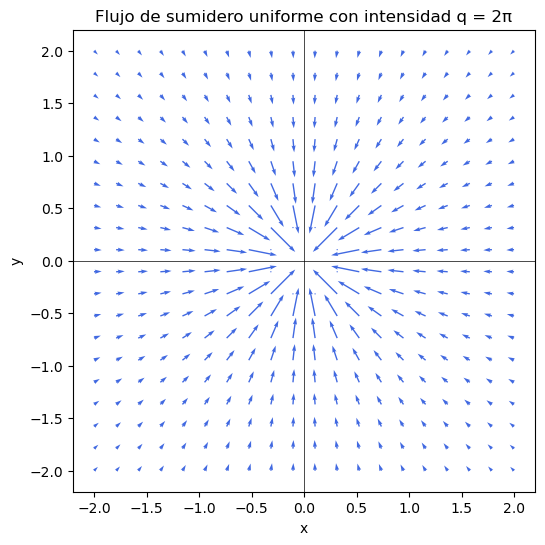

In [2]:
# Definir el campo de velocidad del sumidero
def F2(x, y, q=2*np.pi):
    denom = 2 * np.pi * (x**2 + y**2)
    Fx = -q * x / denom
    Fy = -q * y / denom
    return Fx, Fy

# Crear una malla de puntos
x = np.linspace(-2, 2, 20)
y = np.linspace(-2, 2, 20)
X, Y = np.meshgrid(x, y)

# Evitar la singularidad en el origen
X[Y==0] = np.where((X[Y==0]==0), 1e-6, X[Y==0])

# Calcular los vectores del campo
U, V = F2(X, Y, q=2*np.pi)

# Enmascarar el origen (radio mínimo)
r_min = 0.4
mask = np.sqrt(X**2 + Y**2) < r_min
U[mask] = 0
V[mask] = 0

# Graficar el campo vectorial
plt.figure(figsize=(6,6))
plt.quiver(X, Y, U, V, color="royalblue", angles="xy", scale=30)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Flujo de sumidero uniforme con intensidad q = 2π")
plt.axhline(0, color="k", lw=0.5)
plt.axvline(0, color="k", lw=0.5)
plt.gca().set_aspect("equal")


# Modelo combinado: flujo de huracán

A partir de los ejercicios anteriores, el campo vectorial $F(x,y)$ que modela un huracán,
combinando un flujo de vórtice alrededor del origen con intensidad $k$ y un flujo de sumidero uniforme hacia el origen con intensidad $q$, está dado por:

$$
F(x, y) \;=\; -\frac{1}{2\pi(x^2+y^2)} \Big[ (qx + ky)\,\mathbf{i} \;+\; (qy - kx)\,\mathbf{j} \Big]
$$


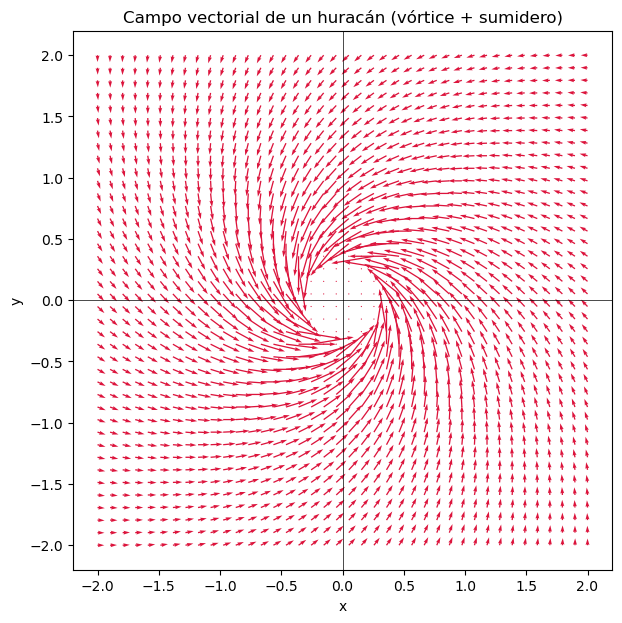

In [3]:
# Campo vectorial del huracán
def F(x, y, k=2*np.pi, q=2*np.pi):
    denom = 2 * np.pi * (x**2 + y**2)
    Fx = -(q*x + k*y) / denom
    Fy = -(q*y - k*x) / denom
    return Fx, Fy

# Crear la malla
x = np.linspace(-2, 2, 40)
y = np.linspace(-2, 2, 40)
X, Y = np.meshgrid(x, y)

# Evitar singularidad en el origen
X[(X==0) & (Y==0)] = 1e-6

# Calcular campo
U, V = F(X, Y, k=2*np.pi, q=2*np.pi)

# Enmascarar el origen (radio mínimo)
r_min = 0.4
mask = np.sqrt(X**2 + Y**2) < r_min
U[mask] = 0
V[mask] = 0

# Graficar campo vectorial
plt.figure(figsize=(7,7))
plt.quiver(X, Y, U, V, color="crimson", angles="xy", scale=40)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Campo vectorial de un huracán (vórtice + sumidero)")
plt.axhline(0, color="k", lw=0.5)
plt.axvline(0, color="k", lw=0.5)
plt.gca().set_aspect("equal")
plt.show()


# Análisis del efecto de $k$ y $q$ en el campo vectorial del huracán

El campo vectorial que estamos usando es:  

$$
\vec{F}(x, y) \;=\; -\frac{1}{2\pi(x^2+y^2)} \Big[ (qx + ky)\,\mathbf{i} \;+\; (qy - kx)\,\mathbf{j} \Big]
$$

donde:  
- $k$ controla la **intensidad del vórtice** (flujo circular alrededor del origen).  
- $q$ controla la **intensidad del sumidero** (flujo radial hacia el origen).  

---

## 1. Manteniendo $q$ fijo y aumentando $k$

- Ecuaciones:  
$$
F_x = -\frac{q x + k y}{2\pi (x^2 + y^2)}, \quad 
F_y = -\frac{q y - k x}{2\pi (x^2 + y^2)}
$$

- **Teóricamente:**  
  - Aumentar $k$ aumenta la componente **tangencial** del flujo ($-k y$ en $F_x$ y $k x$ en $F_y$).  
  - Esto genera un **vórtice más fuerte**, con las trayectorias alrededor del origen más circulares y veloces.  

- **En los gráficos:**  
  - Las flechas se inclinan más **en sentido circular** alrededor del centro.  
  - La magnitud del vector aumenta especialmente en la dirección tangencial.  
  - El flujo radial hacia el centro ($q$) permanece igual, por lo que el "hundimiento" central no cambia.  

---

## 2. Manteniendo $k$ fijo y aumentando $q$

- Ecuaciones:  
$$
F_x = -\frac{q x + k y}{2\pi (x^2 + y^2)}, \quad 
F_y = -\frac{q y - k x}{2\pi (x^2 + y^2)}
$$

- **Teóricamente:**  
  - Aumentar $q$ aumenta la componente **radial** del flujo ($-q x$ en $F_x$ y $-q y$ en $F_y$).  
  - Esto genera un **sumidero más intenso**, es decir, el aire fluye más rápidamente hacia el centro del huracán.  
  - La componente circular ($k$) permanece igual, así que el vórtice no se intensifica.  

- **En los gráficos:**  
  - Las flechas apuntan más **hacia el centro**, indicando mayor atracción radial.  
  - Las trayectorias se ven más **“convergentes”** en lugar de circulares.  
  - La magnitud del vector aumenta en dirección radial hacia el origen.  

---

## Resumen esperado en los subplots

| Fila | Variable que cambia | Efecto principal |
|------|------------------|----------------|
| Superior | $k$ aumenta, $q$ fijo | Vórtice más fuerte, flechas más circulares |
| Inferior | $q$ aumenta, $k$ fijo | Sumidero más fuerte, flechas apuntando más hacia el centro |


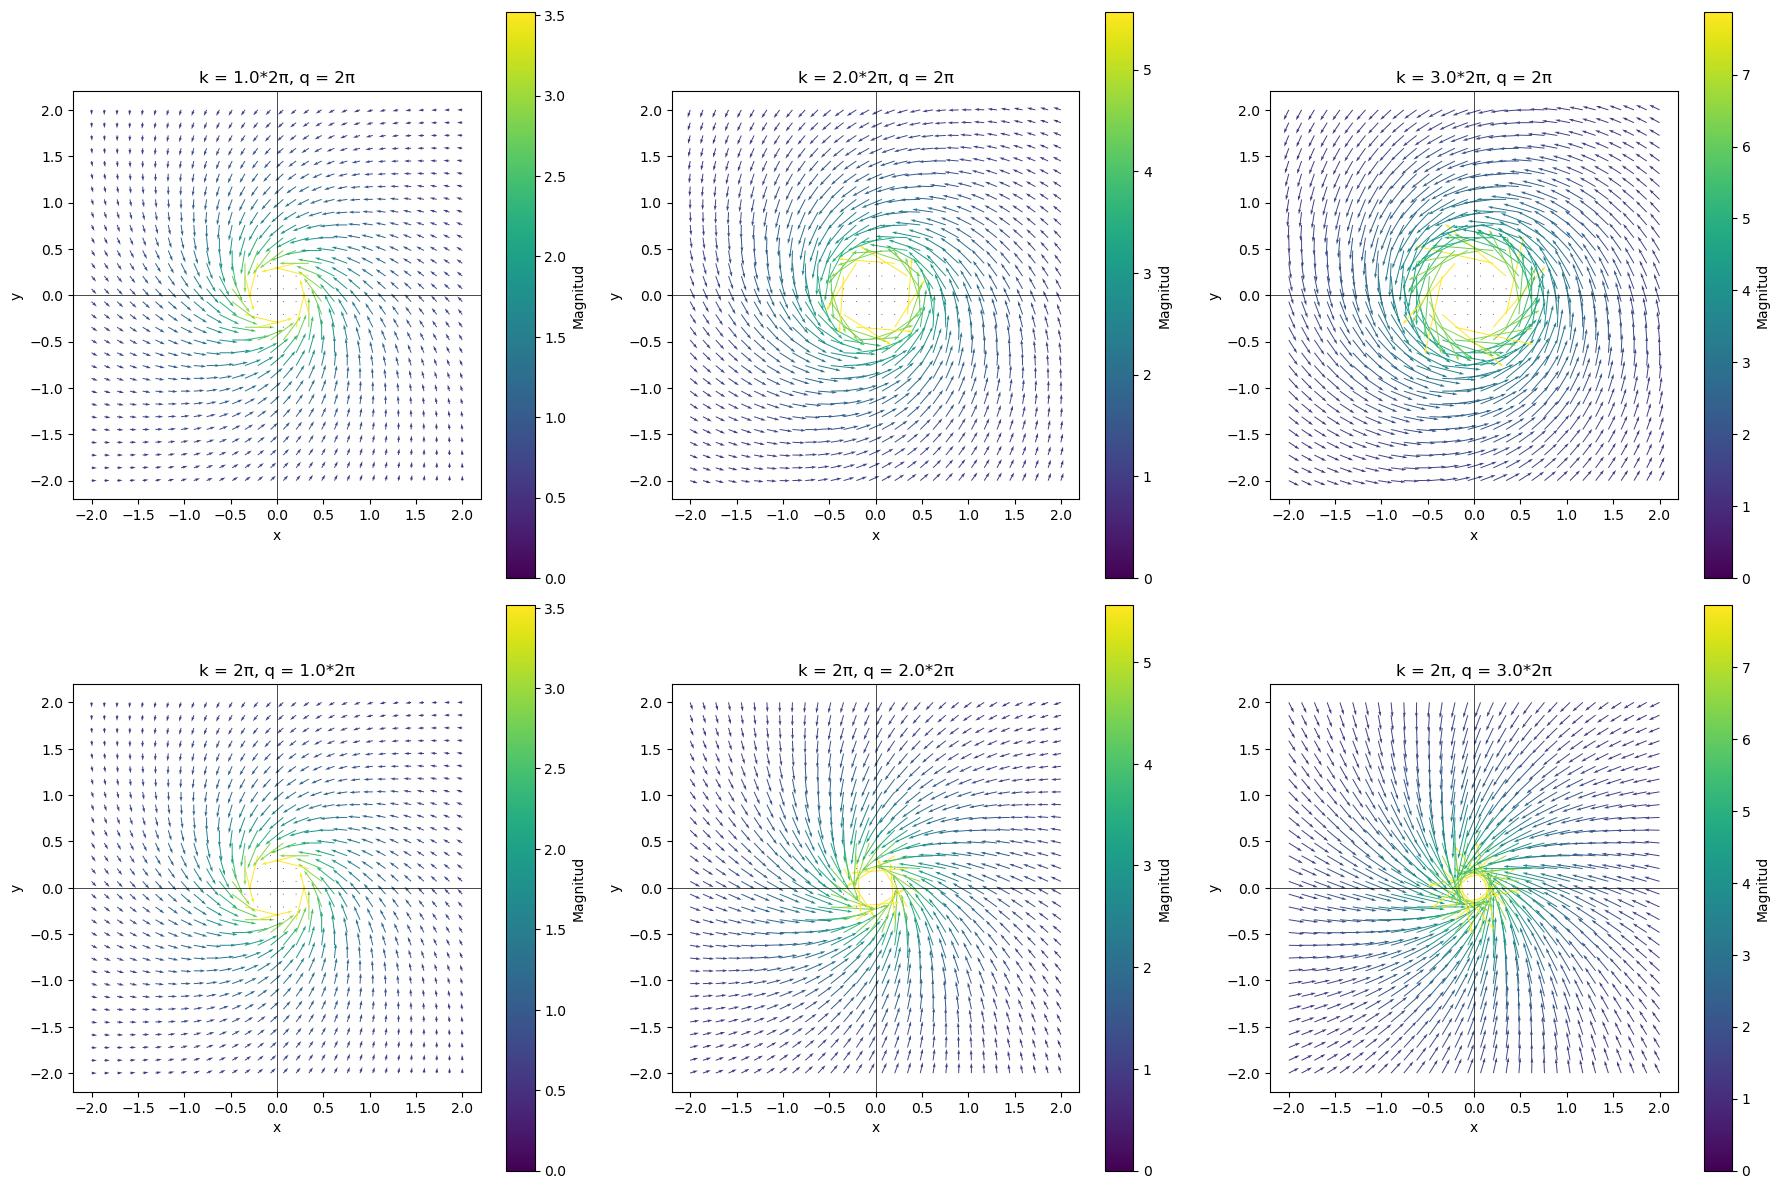

In [4]:
# Campo vectorial
def F(x, y, k=2*np.pi, q=2*np.pi):
    denom = 2 * np.pi * (x**2 + y**2)
    Fx = -(q*x + k*y) / denom
    Fy = -(q*y - k*x) / denom
    return Fx, Fy

# Crear la malla
x = np.linspace(-2, 2, 30)
y = np.linspace(-2, 2, 30)
X, Y = np.meshgrid(x, y)

# Evitar singularidad en el origen
X[(X==0) & (Y==0)] = 1e-6

# Enmascarar el origen
r_min = 0.4
mask = np.sqrt(X**2 + Y**2) < r_min

# Valores para k y q
k_vals = [1*2*np.pi, 2*2*np.pi, 3*2*np.pi]
q_vals = [1*2*np.pi, 2*2*np.pi, 3*2*np.pi]

fig, axes = plt.subplots(2, 3, figsize=(18,12))

# Fila superior: q fijo, variando k
q_fixed = 2*np.pi
for i, k in enumerate(k_vals):
    U, V = F(X, Y, k=k, q=q_fixed)
    U[mask] = 0
    V[mask] = 0
    magnitude = np.sqrt(U**2 + V**2)
    ax = axes[0, i]
    qplot = ax.quiver(X, Y, U, V, magnitude, angles="xy", scale=40, cmap='viridis')
    ax.set_title(f"k = {k/(2*np.pi)}*2π, q = 2π")
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.axhline(0, color="k", lw=0.5)
    ax.axvline(0, color="k", lw=0.5)
    ax.set_aspect("equal")
    fig.colorbar(qplot, ax=ax, orientation='vertical', label='Magnitud')

# Fila inferior: k fijo, variando q
k_fixed = 2*np.pi
for i, q in enumerate(q_vals):
    U, V = F(X, Y, k=k_fixed, q=q)
    U[mask] = 0
    V[mask] = 0
    magnitude = np.sqrt(U**2 + V**2)
    ax = axes[1, i]
    qplot = ax.quiver(X, Y, U, V, magnitude, angles="xy", scale=40, cmap='viridis')
    ax.set_title(f"k = 2π, q = {q/(2*np.pi)}*2π")
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.axhline(0, color="k", lw=0.5)
    ax.axvline(0, color="k", lw=0.5)
    ax.set_aspect("equal")
    fig.colorbar(qplot, ax=ax, orientation='vertical', label='Magnitud')

plt.tight_layout()
plt.show()


# Modelado del Huracán Isaac

Se utiliza el campo vectorial:  

$$
\vec{F}(x, y) = -\frac{1}{2 \pi (x^2 + y^2)} 
\begin{pmatrix} (q x + k y) \\ (q y - k x) \end{pmatrix}
$$

donde:  
- $k$ controla la **intensidad del vórtice** (flujo circular).  
- $q$ controla la **intensidad del sumidero** (flujo radial hacia el centro).  

---

## Deducción de las componentes en coordenadas polares

Se pasa a coordenadas polares:  

$$
r = \sqrt{x^2 + y^2}, \quad
\hat{r} = \frac{(x, y)}{r}, \quad
\hat{\theta} = \frac{(-y, x)}{r}
$$

El campo vectorial puede descomponerse en:  

$$
\vec{F} = v_r \hat{r} + v_\theta \hat{\theta}
$$

Multiplicando:

$$
F_x = v_r \frac{x}{r} - v_\theta \frac{y}{r}, \quad 
F_y = v_r \frac{y}{r} + v_\theta \frac{x}{r}
$$

Comparando con el modelo:

$$
F_x = -\frac{q x + k y}{2 \pi r^2}, \quad
F_y = -\frac{q y - k x}{2 \pi r^2}
$$

De aquí se deduce:

$$
v_r = -\frac{q}{2 \pi r}, \quad v_\theta = \frac{k}{2 \pi r}
$$

---

## a) Intensidades $k$ y $q$

Se nos dan datos a $r = 20 \text{ km}$ del ojo:  

$$
v_{\text{radial}} = 15 \text{ km/h}, \quad v_{\text{tangencial}} = 45 \text{ km/h}
$$

En coordenadas polares:  

$$
v_r = -\frac{q}{2 \pi r}, \quad v_\theta = \frac{k}{2 \pi r}
$$

Sustituyendo los datos:

$$
15 = \frac{q}{2 \pi \cdot 20} \Rightarrow q = 15 \cdot 2 \pi \cdot 20 \approx 1885
$$

$$
45 = \frac{k}{2 \pi \cdot 20} \Rightarrow k = 45 \cdot 2 \pi \cdot 20 \approx 5655
$$

**Resultado:**

$$
\boxed{k \approx 5655, \quad q \approx 1885 \text{ km²/h}}
$$

---

## b) Campo vectorial $F(x, y)$ del Huracán Isaac

Sustituyendo $k$ y $q$:

$$
F_x(x, y) = -\frac{1885 x + 5655 y}{2 \pi (x^2 + y^2)}, \quad
F_y(x, y) = -\frac{1885 y - 5655 x}{2 \pi (x^2 + y^2)}
$$

$$
F(x, y) = \frac{1}{2 \pi (x^2 + y^2)} 
\begin{pmatrix} -(1885 x + 5655 y) \\ -(1885 y - 5655 x) \end{pmatrix} \quad [\text{km/h}]
$$

---

## c) Estimar el tamaño del huracán

La rapidez del viento es:  

$$
v = \sqrt{v_r^2 + v_\theta^2} = \frac{\sqrt{k^2 + q^2}}{2 \pi r}
$$

Queremos $v < 5 \text{ km/h}$, despejamos $r$:  

$$
r = \frac{\sqrt{k^2 + q^2}}{2 \pi \cdot 5} = \frac{\sqrt{5655^2 + 1885^2}}{31.416} \approx 190 \text{ km}
$$

---

### Resumen final

- Intensidades: $k \approx 5655$, $q \approx 1885$ km²/h  
- Campo vectorial:  
$$
F(x, y) = \frac{1}{2 \pi (x^2 + y^2)} 
\begin{pmatrix} -(1885 x + 5655 y) \\ -(1885 y - 5655 x) \end{pmatrix} \text{ km/h}
$$  
- Tamaño estimado: $r \approx 190 \text{ km}$ (velocidad < 5 km/h)


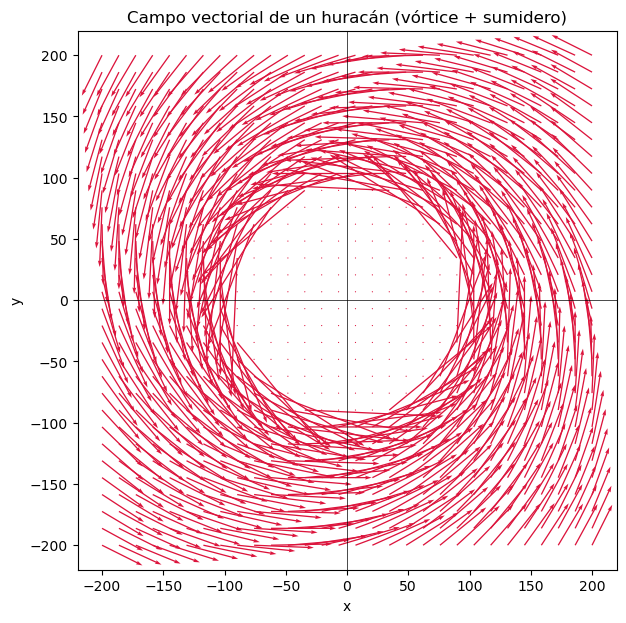

In [5]:
# Campo vectorial del huracán
def F(x, y, k=5655, q=1885):
    denom = 2 * np.pi * (x**2 + y**2)
    Fx = -(q*x + k*y) / denom
    Fy = -(q*y - k*x) / denom
    return Fx, Fy

# Crear la malla
x = np.linspace(-200, 200, 30)
y = np.linspace(-200, 200, 30)
X, Y = np.meshgrid(x, y)

# Evitar singularidad en el origen
X[(X==0) & (Y==0)] = 1e-6

# Calcular campo
U, V = F(X, Y, k=5655, q=1885)

# Enmascarar el origen (radio mínimo)
r_min = 95
mask = np.sqrt(X**2 + Y**2) < r_min
U[mask] = 0
V[mask] = 0

# Graficar campo vectorial
plt.figure(figsize=(7,7))
plt.quiver(X, Y, U, V, color="crimson", angles="xy", scale=40)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Campo vectorial de un huracán (vórtice + sumidero)")
plt.axhline(0, color="k", lw=0.5)
plt.axvline(0, color="k", lw=0.5)
plt.gca().set_aspect("equal")
plt.show()


# Líneas de corriente para el modelo básico de un huracán

- Las **líneas de corriente** son las trayectorias que siguen las partículas en un flujo de fluido.  
- El **campo de velocidad** $\vec{F}(x, y)$ es **tangente** a las líneas de corriente.  
- Si las líneas de corriente pueden representarse como curvas de nivel de una función $\psi(x, y)$, entonces $\psi$ se llama **función de corriente** del flujo.  
- Como $\vec{F}$ es tangente a las líneas de corriente, se cumple:  

$$
\vec{F} \cdot \nabla \psi = 0
$$

- El objetivo es usar esta ecuación para encontrar $\psi$ y luego trazar las **líneas de corriente** del modelo básico del huracán.  

- Debido a que los flujos de **vórtice** y **sumidero** tienen **simetría central**, es más sencillo expresar las ecuaciones en **coordenadas polares** $(r, \theta)$ que en rectangulares.  

- En coordenadas polares, se puede escribir el vector de velocidad $\vec{F}$ en términos de **vectores unitarios ortogonales**:  

$$
\hat{u}_r = \cos\theta \, \hat{i} + \sin\theta \, \hat{j}, \quad
\hat{u}_\theta = -\sin\theta \, \hat{i} + \cos\theta \, \hat{j}
$$

- $\hat{u}_r$ es el **vector radial unitario**, apunta hacia fuera desde el origen.  
- $\hat{u}_\theta$ es el **vector transversal unitario**, obtenido al rotar $\hat{u}_r$ 90° en sentido contrario a las manecillas del reloj.  

- Esta representación facilita la obtención de la función de corriente $\psi(r, \theta)$ y, por lo tanto, de las **líneas de corriente** del huracán.


# Demostración: Expresión del campo vectorial en coordenadas polares

El campo vectorial del huracán es:

$$
\vec{F}(x, y) = \frac{1}{2 \pi (x^2 + y^2)}
\begin{pmatrix}
-(q x + k y) \\
-(q y - k x)
\end{pmatrix}
$$

---

## 1. Definir coordenadas polares

$$
x = r \cos\theta, \quad y = r \sin\theta, \quad r = \sqrt{x^2 + y^2}
$$

y los vectores unitarios ortogonales:

$$
\hat{u}_r = \cos\theta \, \hat{i} + \sin\theta \, \hat{j}, \quad
\hat{u}_\theta = -\sin\theta \, \hat{i} + \cos\theta \, \hat{j}
$$

---

## 2. Expresar $x$ y $y$ en términos de $\hat{u}_r$ y $\hat{u}_\theta$

Multiplicamos y reorganizamos:

$$
x = r \cos\theta, \quad y = r \sin\theta
$$

Entonces:

$$
x \hat{i} + y \hat{j} = r (\cos\theta \hat{i} + \sin\theta \hat{j}) = r \hat{u}_r
$$

$$
y \hat{i} - x \hat{j} = r (\sin\theta \hat{i} - \cos\theta \hat{j}) = - r \hat{u}_\theta
$$

---

## 3. Reescribir $\vec{F}$ en términos de $\hat{u}_r$ y $\hat{u}_\theta$

Originalmente:

$$
\vec{F} = \frac{1}{2 \pi r^2} \left[ -(q x + k y) \hat{i} - (q y - k x) \hat{j} \right]
$$

Factorizamos $r$ usando los vectores unitarios:

$$
-(q x + k y) \hat{i} - (q y - k x) \hat{j} 
= -q (x \hat{i} + y \hat{j}) + k (-y \hat{i} + x \hat{j})
= -q (r \hat{u}_r) + k (r \hat{u}_\theta)
= - r (q \hat{u}_r - k \hat{u}_\theta)
$$

Dividiendo por $2 \pi r^2$:

$$
\vec{F} = \frac{- r (q \hat{u}_r - k \hat{u}_\theta)}{2 \pi r^2} = -\frac{1}{2 \pi r} (q \hat{u}_r - k \hat{u}_\theta)
$$

---

## Conclusión

El campo vectorial se puede escribir como:

$$
\boxed{\vec{F} = - \frac{1}{2 \pi r} (q \, \hat{u}_r - k \, \hat{u}_\theta)}
$$

Esto muestra que el flujo radial está asociado a $q$ y el flujo tangencial (vórtice) está asociado a $k$.


# Función de corriente y ortogonalidad con el campo vectorial

## 1. Gradiente de la función de corriente en coordenadas polares

Si $\psi(r, \theta)$ es la función de corriente, su gradiente se puede expresar como:

$$
\nabla \psi = \frac{\partial \psi}{\partial r} \, \hat{u}_r + \frac{1}{r} \frac{\partial \psi}{\partial \theta} \, \hat{u}_\theta
$$

donde $\hat{u}_r$ y $\hat{u}_\theta$ son los vectores unitarios radial y transversal:

$$
\hat{u}_r = \cos\theta \, \hat{i} + \sin\theta \, \hat{j}, \quad
\hat{u}_\theta = -\sin\theta \, \hat{i} + \cos\theta \, \hat{j}
$$

---

## 2. Campo vectorial del huracán en coordenadas polares

El modelo básico del huracán se expresa como:

$$
\vec{F} = -\frac{1}{2 \pi r} \big( q \hat{u}_r - k \hat{u}_\theta \big)
$$

---

## 3. Condición de ortogonalidad

La función de corriente $\psi$ debe ser **ortogonal** al flujo:

$$
\nabla \psi \cdot \vec{F} = 0
$$

Sustituyendo $\nabla \psi$ y $\vec{F}$:

$$
\left( \frac{\partial \psi}{\partial r} \, \hat{u}_r + \frac{1}{r} \frac{\partial \psi}{\partial \theta} \, \hat{u}_\theta \right) \cdot \left( -\frac{1}{2 \pi r} (q \hat{u}_r - k \hat{u}_\theta) \right) = 0
$$

$$
-\frac{1}{2 \pi r} \left[ \frac{\partial \psi}{\partial r} q - \frac{1}{r} \frac{\partial \psi}{\partial \theta} k \right] = 0
$$

Multiplicando por $-2 \pi r$:

$$
q \frac{\partial \psi}{\partial r} - \frac{k}{r} \frac{\partial \psi}{\partial \theta} = 0
$$

---

## 4. Ecuación final de ortogonalidad

De aquí se obtiene:

$$
\frac{\partial \psi}{\partial r} = \frac{k}{q r} \frac{\partial \psi}{\partial \theta}
$$

Esta ecuación relaciona la variación radial y tangencial de la función de corriente para el modelo básico de un huracán.


# Función de corriente para el modelo básico de un huracán

## 2. Integración directa

Podemos integrar **primero con respecto a $r$**, manteniendo $\theta$ constante:

$$
\partial_r \psi = \frac{k}{r} \quad \Rightarrow \quad \psi(r, \theta) = k \ln r + f(\theta)
$$

donde $f(\theta)$ es una función a determinar.

Sustituimos en la ecuación de ortogonalidad para encontrar $f(\theta)$:

$$
\frac{k}{r} - \frac{k}{qr} f'(\theta) = 0 \quad \Rightarrow \quad f'(\theta) = q \quad \Rightarrow \quad f(\theta) = q \theta
$$

---

## 3. Función de corriente final

$$
\boxed{\psi(r, \theta) = k \ln r + q \theta}
$$

Esta función de corriente cumple la condición $\nabla \psi \cdot \vec{F} = 0$ y describe las **líneas de corriente** del modelo básico del huracán.


# Líneas de corriente como espirales logarítmicas

## 1. Función de corriente

Para el modelo básico del huracán tenemos:

$$
\psi(r, \theta) = k \ln r + q \theta
$$

---

## 2. Líneas de corriente

Las líneas de corriente son curvas de nivel de $\psi$:

$$
\psi(r, \theta) = C
$$

Sustituyendo la función de corriente:

$$
k \ln r + q \theta = C
$$

---

## Resolvemos para $r$

$$
k \ln r = C - q \theta
$$

$$
\ln r = \frac{C - q \theta}{k}
$$

$$
r = e^{(C - q \theta)/k} = e^{C/k} \, e^{- (q/k) \theta}
$$

Definiendo $K = e^{C/k} > 0$, se obtiene:

$$
\boxed{r = K \, e^{- (q/k) \theta}}
$$

---

## Notemos que:

- Las **líneas de corriente** para el modelo básico del huracán son **espirales logarítmicas**.  
- El parámetro $q/k$ controla la apertura de la espiral:  
  - Mayor $q$ → espiral más cerrada (flujo radial más fuerte)  
  - Mayor $k$ → espiral más abierta (vórtice más intenso)  


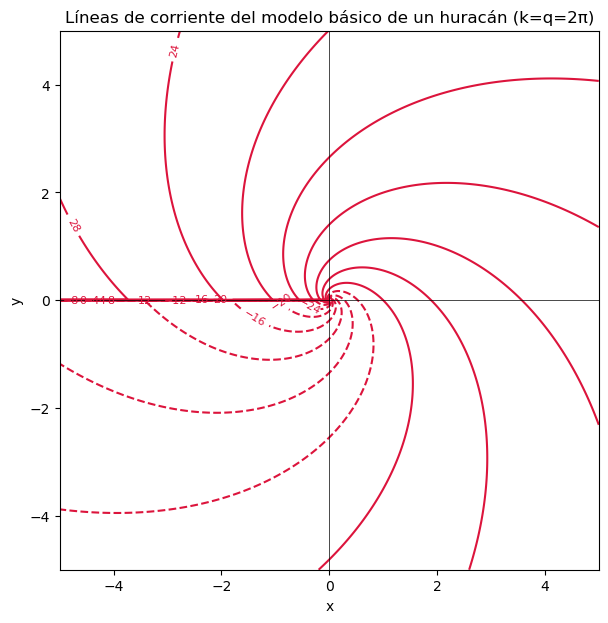

In [6]:
# Intensidades
k = 2 * np.pi
q = 2 * np.pi

# Función de corriente: psi = k ln r + q theta
def psi(x, y):
    r = np.sqrt(x**2 + y**2)
    theta = np.arctan2(y, x)
    return k * np.log(r) + q * theta

# Crear malla
x = np.linspace(-5, 5, 400)
y = np.linspace(-5, 5, 400)
X, Y = np.meshgrid(x, y)

# Calcular psi en cada punto de la malla
Z = psi(X, Y)

# Graficar curvas de nivel (líneas de corriente)
plt.figure(figsize=(7,7))
contours = plt.contour(X, Y, Z, levels=20, colors='crimson')
plt.clabel(contours, inline=True, fontsize=8)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Líneas de corriente del modelo básico de un huracán (k=q=2π)')
plt.axhline(0, color='k', lw=0.5)
plt.axvline(0, color='k', lw=0.5)
plt.gca().set_aspect('equal')
plt.show()


# Línea de corriente de Isaac

**Datos conocidos (Isaac):**
- $k = 5655$ km²/h  
- $q = 1885$ km²/h  
- Punto dado: $r_0 = 20$ km, $\theta_0 = 45^\circ = \pi/4$

---

## 1. Familia de líneas de corriente
La función de corriente del modelo es
$$
\psi(r,\theta) = k \ln r + q \theta = \text{const}.
$$
De aquí las curvas de nivel son
$$
k \ln r + q \theta = C \quad\Longrightarrow\quad
\ln r = \frac{C - q\theta}{k}
$$
y por tanto
$$
r = K \, e^{-(q/k)\theta},\qquad K = e^{C/k} > 0.
$$

---

## 2. Cociente $q/k$
Calculemos el cociente que controla la apertura de la espiral:
$$
\frac{q}{k}=\frac{1885}{5655}=\frac{1}{3}\approx 0.333333\ldots
$$

Así la familia se escribe
$$
\boxed{\,r(\theta)=K\,e^{-(1/3)\theta}\,}
$$

---

## 3. Constante $K$ para la curva que pasa por $(r_0,\theta_0)$

Imponemos que la espiral pase por el punto dado:
$$
r_0 = K \, e^{-(1/3)\theta_0}
\quad\Longrightarrow\quad
K = r_0 \, e^{(1/3)\theta_0}.
$$

Sustituyendo $r_0=20$ y $\theta_0=\pi/4$:

1. Calcular $(q/k)\theta_0 = \tfrac{1}{3}\cdot\tfrac{\pi}{4} = \tfrac{\pi}{12}$.  
   $$
   \frac{q}{k}\theta_0 = \frac{\pi}{12} \approx 0.2617993878
   $$

2. Calcular $e^{\pi/12}$:
   $$
   e^{\pi/12} \approx e^{0.2617993878} \approx 1.2990
   $$

3. Calcular $K$:
   $$
   K = 20 \times e^{\pi/12} \approx 20 \times 1.2990 \approx 25.979
   $$

Por tanto la curva buscada es
$$
\boxed{\,r(\theta)=20\,e^{\pi/12}\,e^{-(1/3)\theta}\approx 25.979\,e^{-(1/3)\theta}\,}
$$

(o, equivalentemente, $r(\theta)=K e^{-(1/3)\theta}$ con $K\approx25.979$.)

---

## 4. Coordenadas cartesianas del punto dado

El punto $(r_0,\theta_0)=(20,\pi/4)$ en cartesianas es
$$
x_0 = r_0\cos\theta_0 = 20\cos\frac{\pi}{4} = 20\cdot\frac{\sqrt{2}}{2} \approx 14.1421\ \text{km},
$$
$$
y_0 = r_0\sin\theta_0 = 20\sin\frac{\pi}{4} = 20\cdot\frac{\sqrt{2}}{2} \approx 14.1421\ \text{km}.
$$

---

## 5. Resumen final

- Familia general: $\;r(\theta)=K\,e^{-(q/k)\theta}=\;K\,e^{-(1/3)\theta}.$  
- Curva que pasa por $(20,\pi/4)$:
  $$
  \boxed{\,r(\theta)=20\,\exp\!\big(\tfrac{1}{3}\theta_0\big)\,e^{-(1/3)\theta}
  \;=\;20\,e^{\pi/12}\,e^{-(1/3)\theta}\approx 25.979\,e^{-(1/3)\theta}\,.}
  $$
- Punto dado en cartesianas: $(x_0,y_0)\approx(14.1421,\;14.1421)$ km.



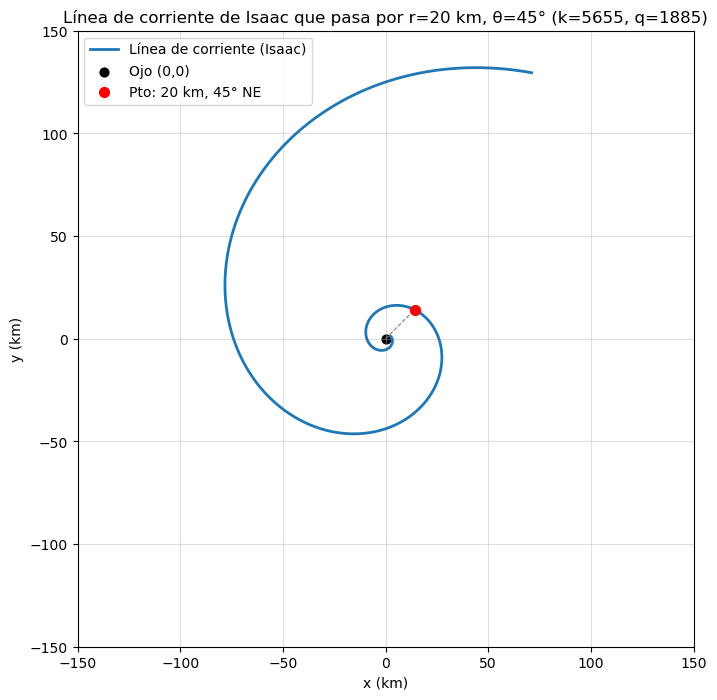

In [7]:
# Parámetros de Isaac
k = 5655.0
q = 1885.0
ratio = q / k  # = 1/3

# Punto dado (r0, theta0)
r0 = 20.0                    # km
theta0 = np.pi / 4           # 45 degrees (NE)

# Constante K que define la espiral que pasa por (r0, theta0)
K = r0 * np.exp(ratio * theta0)

# Parametrización r(theta) de la espiral
def r_of_theta(theta):
    return K * np.exp(-ratio * theta)

# Rango de theta a graficar (varía para mostrar varias vueltas)
theta_min = theta0 - 6.0
theta_max = theta0 + 6.0
theta = np.linspace(theta_min, theta_max, 4000)

# Coordenadas cartesianas
r = r_of_theta(theta)
X = r * np.cos(theta)
Y = r * np.sin(theta)

# Punto original en cartesianas
x0 = r0 * np.cos(theta0)
y0 = r0 * np.sin(theta0)

# Graficar
plt.figure(figsize=(8,8))
plt.plot(X, Y, '-', linewidth=2, label='Línea de corriente (Isaac)')
plt.scatter([0], [0], color='k', s=40, label='Ojo (0,0)')
plt.scatter([x0], [y0], color='red', s=50, zorder=5, label='Pto: 20 km, 45° NE')
plt.plot([0, x0], [0, y0], '--', color='gray', linewidth=0.8)  # línea radial al punto

# Opciones de visualización
plt.gca().set_aspect('equal', 'box')
lim = 150
plt.xlim(-lim, lim)
plt.ylim(-lim, lim)
plt.xlabel('x (km)')
plt.ylabel('y (km)')
plt.title('Línea de corriente de Isaac que pasa por r=20 km, θ=45° (k=5655, q=1885)')
plt.legend()
plt.grid(alpha=0.4)
plt.show()


Por último, se agregó la linea de corriente al gráfico del campo vectorial de velocidad obtenido para el huracán Isaac

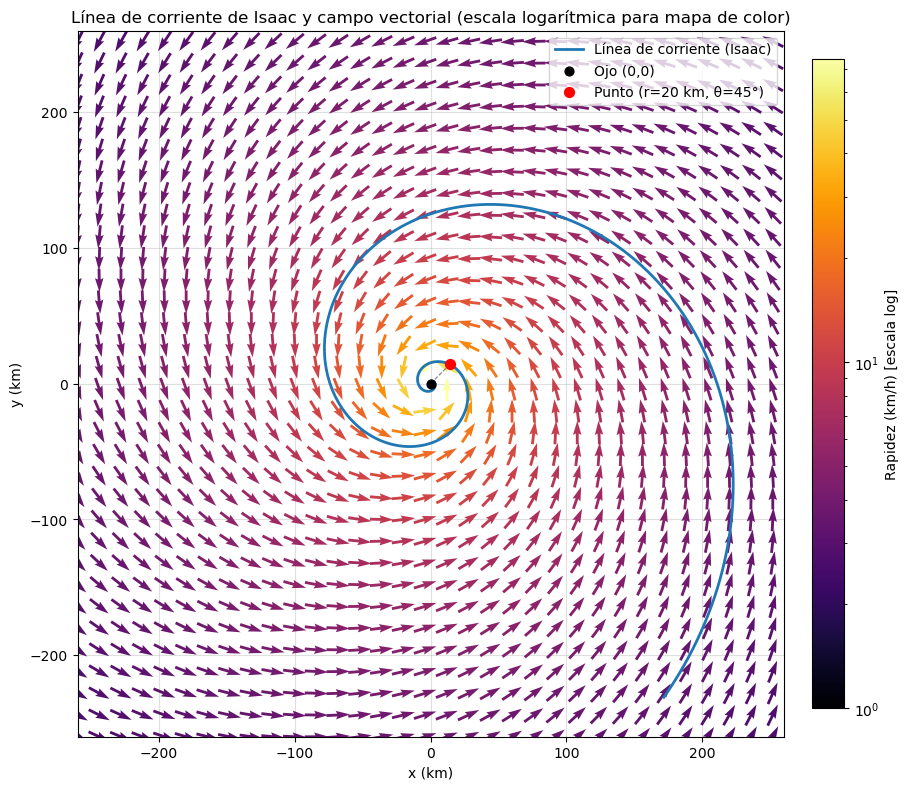

In [8]:
import matplotlib.colors as mcolors

# Parámetros de Isaac
k = 5655.0   # km^2/h
q = 1885.0   # km^2/h
ratio = q / k  # = 1/3

# Punto dado (r0, theta0)
r0 = 20.0
theta0 = np.pi/4

# Constante K de la espiral que pasa por (r0, theta0)
K = r0 * np.exp(ratio * theta0)

# Parametrización de la espiral r(theta)
def r_of_theta(theta):
    return K * np.exp(-ratio * theta)

# Campo vectorial F (en km/h)
def F_field(x, y, k=k, q=q):
    r2 = x**2 + y**2
    with np.errstate(divide='ignore', invalid='ignore'):
        Fx = -(q * x + k * y) / (2 * np.pi * r2)
        Fy = -(q * y - k * x) / (2 * np.pi * r2)
    return Fx, Fy

# --- Datos de la espiral ---
theta = np.linspace(theta0 - 8.0, theta0 + 8.0, 8000)
r = r_of_theta(theta)
X_spiral = r * np.cos(theta)
Y_spiral = r * np.sin(theta)

# Punto en cartesianas
x0 = r0 * np.cos(theta0)
y0 = r0 * np.sin(theta0)

# --- Malla para campo vectorial ---
lim = 260  # km
grid_spacing = 16.0
xs = np.arange(-lim, lim + grid_spacing, grid_spacing)
ys = np.arange(-lim, lim + grid_spacing, grid_spacing)
Xg, Yg = np.meshgrid(xs, ys)

Ug, Vg = F_field(Xg, Yg)

# Enmascarar origen
r_grid = np.sqrt(Xg**2 + Yg**2)
r_min = 8.0
mask = r_grid < r_min
Ug = np.where(mask, np.nan, Ug)
Vg = np.where(mask, np.nan, Vg)

# Magnitud y normalización
mag = np.sqrt(Ug**2 + Vg**2)
Ug_unit = Ug / mag
Vg_unit = Vg / mag

# --- Plot ---
fig, ax = plt.subplots(figsize=(9,9), constrained_layout=True)

# Espiral
ax.plot(X_spiral, Y_spiral, '-', linewidth=2.0, label='Línea de corriente (Isaac)', zorder=3)

# Campo vectorial con escala logarítmica en color
qplot = ax.quiver(
    Xg, Yg, Ug_unit, Vg_unit, mag,
    angles='xy', scale=30, cmap='inferno',
    norm=mcolors.LogNorm(vmin=1, vmax=np.nanmax(mag)),
    pivot='middle', width=0.004, zorder=2
)

# Puntos
ax.scatter([0], [0], color='k', s=40, label='Ojo (0,0)', zorder=5)
ax.scatter([x0], [y0], color='red', s=50, zorder=6, label='Punto (r=20 km, θ=45°)')
ax.plot([0, x0], [0, y0], '--', color='gray', linewidth=0.8, zorder=4)

# Decoración
ax.set_aspect('equal', 'box')
ax.set_xlim(-lim, lim)
ax.set_ylim(-lim, lim)
ax.set_xlabel('x (km)')
ax.set_ylabel('y (km)')
ax.set_title('Línea de corriente de Isaac y campo vectorial (escala logarítmica para mapa de color)')
ax.grid(alpha=0.4)
ax.legend(loc='upper right')

cbar = fig.colorbar(qplot, ax=ax, orientation='vertical', fraction=0.046, pad=0.04)
cbar.set_label('Rapidez (km/h) [escala log]')
#plt.savefig("modelo_Huracán.jpg")
plt.show()

